### **LAB8**
### **AIM: Python program to perform K-Means Clustering on Breast Cancer Data**

Nirali Shah | CE122

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer

In [2]:
bcancer=load_breast_cancer()
bcancer.data.shape

(569, 30)

In [6]:
kmeans=KMeans(n_clusters=10,random_state=122)
predictions=kmeans.fit_predict(bcancer.data)
predictions

array([8, 8, 1, 0, 1, 4, 1, 4, 4, 4, 3, 7, 7, 3, 4, 3, 3, 7, 6, 4, 0, 5,
       3, 6, 8, 7, 3, 7, 7, 7, 1, 4, 7, 1, 7, 7, 4, 0, 4, 4, 4, 0, 1, 4,
       4, 1, 5, 4, 0, 4, 0, 4, 0, 7, 3, 0, 8, 3, 0, 5, 5, 5, 3, 5, 4, 3,
       5, 0, 5, 0, 8, 5, 1, 4, 0, 7, 0, 1, 1, 0, 0, 0, 2, 7, 0, 1, 4, 1,
       0, 4, 4, 4, 4, 4, 3, 1, 0, 5, 0, 4, 4, 5, 0, 5, 5, 4, 0, 0, 6, 0,
       5, 0, 4, 5, 5, 0, 5, 3, 7, 7, 0, 1, 6, 4, 0, 4, 4, 1, 4, 1, 0, 3,
       7, 3, 1, 0, 0, 0, 3, 5, 5, 7, 0, 0, 5, 0, 0, 4, 4, 4, 0, 5, 5, 5,
       4, 0, 7, 3, 0, 0, 0, 1, 8, 0, 6, 4, 5, 7, 1, 4, 0, 3, 3, 5, 5, 5,
       5, 3, 0, 0, 2, 8, 7, 0, 3, 5, 7, 0, 0, 0, 4, 0, 5, 4, 4, 0, 4, 7,
       1, 3, 0, 7, 8, 3, 0, 3, 5, 7, 0, 3, 1, 0, 2, 3, 4, 4, 0, 5, 8, 6,
       4, 4, 5, 3, 4, 4, 5, 4, 0, 4, 7, 0, 0, 8, 5, 4, 2, 1, 4, 7, 4, 0,
       0, 4, 1, 5, 0, 0, 5, 0, 8, 0, 8, 7, 8, 4, 8, 3, 7, 3, 8, 7, 7, 3,
       7, 2, 5, 4, 0, 5, 4, 0, 6, 5, 7, 0, 0, 7, 4, 4, 1, 0, 1, 3, 0, 0,
       0, 0, 5, 0, 4, 4, 0, 0, 0, 4, 5, 0, 4, 5, 8,

In [8]:
print(len(predictions))
kmeans.cluster_centers_.shape

569


(10, 30)

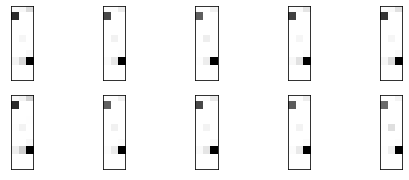

In [17]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,5,figsize=(8,3))
centers=kmeans.cluster_centers_.reshape(10,10,3)
for axi,center in zip(ax.flat,centers):
  axi.set(xticks=[],yticks=[])
  axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)

In [10]:
import numpy as np
from scipy.stats import mode

labels=np.zeros_like(predictions)
for i in range(10):
  mask=(predictions==i)
  labels[mask]=mode(bcancer.target[mask])[0]

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(bcancer.target, labels)

0.9068541300527241

Text(91.68, 0.5, 'predicted label')

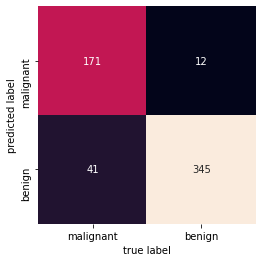

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat=confusion_matrix(bcancer.target,labels)
ax=sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
               xticklabels=bcancer.target_names,yticklabels=bcancer.target_names)
ax.set_ylim(2.0,0)
plt.xlabel('true label')
plt.ylabel('predicted label')